In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import operator

df1=pd.read_csv(r'Titles.csv')
df1.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [2]:
#Dropping unnecessary columns
df1.drop(columns=['description','tmdb_popularity','tmdb_score','imdb_id'],inplace=True)
df1.columns

Index(['id', 'title', 'type', 'release_year', 'age_certification', 'runtime',
       'genres', 'production_countries', 'seasons', 'imdb_score',
       'imdb_votes'],
      dtype='object')

In [3]:
df1.isnull().sum()

id                         0
title                      1
type                       0
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_score               482
imdb_votes               498
dtype: int64

In [4]:
#Dealing with columns
df1['age_certification'].fillna('Unknown',inplace=True)
# df1['title'].dropna(inplace=True)
df1['seasons'].fillna(0,inplace=True)
df1['imdb_score'].fillna(5,inplace=True)
df1['imdb_votes'].fillna(0,inplace=True)

In [5]:
#Dealing with columns   
df1.dropna(inplace=True)
df1.isnull().sum()


id                      0
title                   0
type                    0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_score              0
imdb_votes              0
dtype: int64

In [6]:
#fixing strings in genres and production_countries
df1['genres']=df1['genres'].str.replace('\[\'','',regex=True)
df1['genres']=df1['genres'].str.replace('\'\]','',regex=True)
df1['genres']=df1['genres'].str.replace('\'','',regex=True)
df1['genres']=df1['genres'].str.replace(' ','',regex=True)

df1['production_countries']=df1['production_countries'].str.replace('\[\'','',regex=True)
df1['production_countries']=df1['production_countries'].str.replace('\'\]','',regex=True)
df1['production_countries']=df1['production_countries'].str.replace('\'','',regex=True)
df1['production_countries']=df1['production_countries'].str.replace(' ','',regex=True)

Text(0.5, 1.0, 'movies & show count')

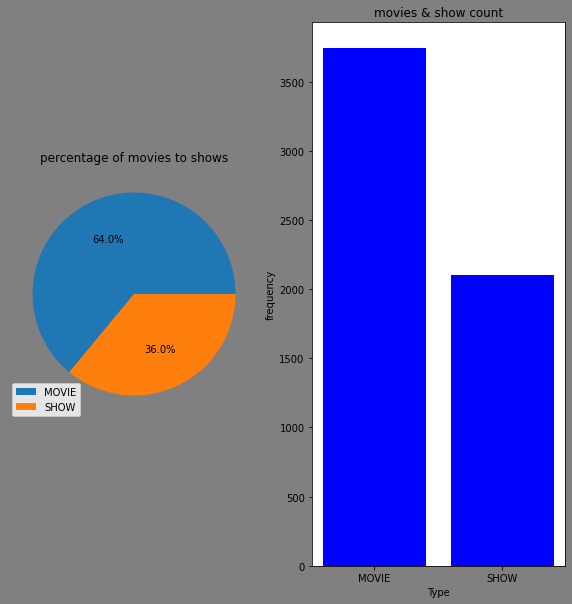

In [7]:

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,10))
fig.patch.set_facecolor('grey')
axes[0].pie(df1['type'].value_counts() ,autopct='%1.1f%%')
axes[0].set_title('percentage of movies to shows',loc='center')
axes[0].legend(labels=df1['type'].value_counts().index ,fontsize=10,loc='lower left')

axes[1].bar(df1['type'].value_counts().index,df1['type'].value_counts(),color='blue')
axes[1].set_xlabel('Type')
axes[1].set_ylabel('frequency')
axes[1].set_title('movies & show count')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''

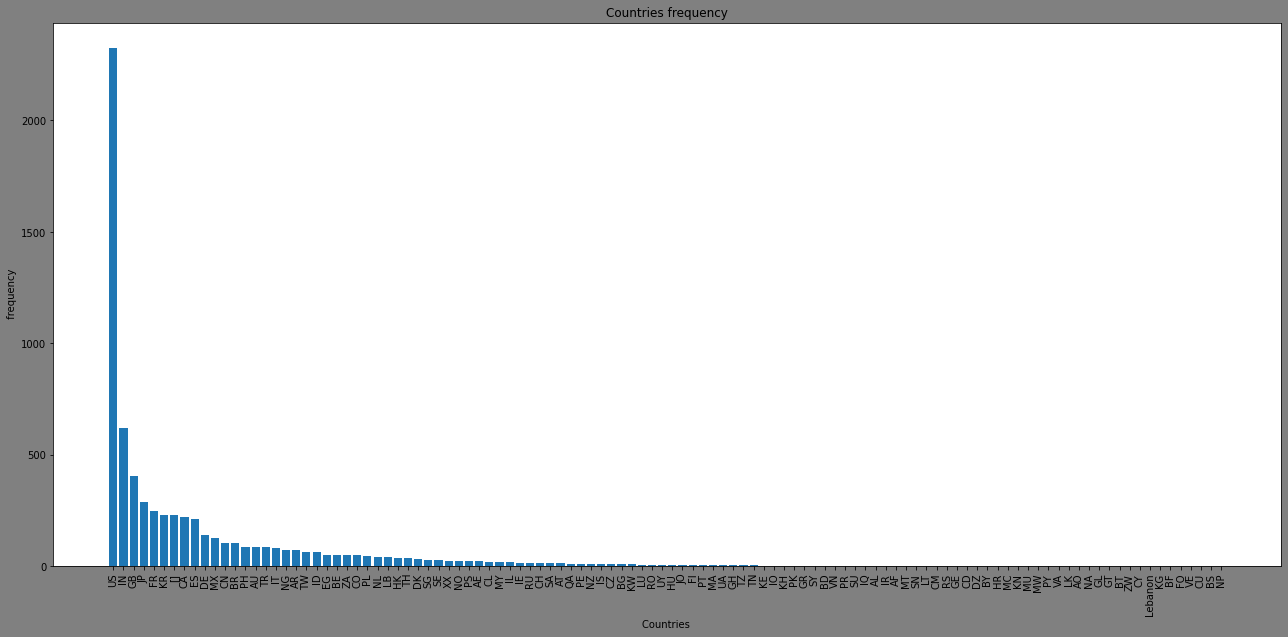

In [8]:
#getting unique values of the production countries
prod=list(df1['production_countries'])
final_prod=[]
dictt={}
for i in range(len(prod)):
    if ',' in prod[i]:
        for c in prod[i].split(','):
            final_prod.append(c)
    else:
        final_prod.append(prod[i])


for i in list(set(final_prod)):
    dictt[i]=final_prod.count(i)
    # print(i,' ',final_prod.count(i))


dictt=dict(sorted(dictt.items(),key=operator.itemgetter(1),reverse=True))


fig,axes=plt.subplots(figsize=(22,10))    
fig.patch.set_facecolor('grey')
axes.bar(dictt.keys(),dictt.values())
axes.set_title('Countries frequency')
axes.set_xlabel('Countries ')
axes.set_ylabel(' frequency')
plt.xticks(rotation ='vertical')

Text(0.5, 1.0, 'unique values  of genres')

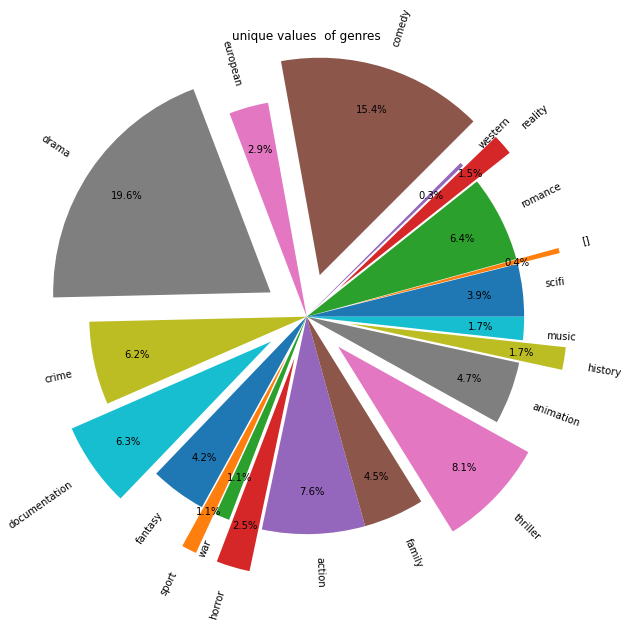

In [23]:
#getting unique values of the genres
genre=list(df1['genres'])
full_genres=[]
ddi={}
for i in range(len(genre)):
    if ',' in genre[i]:
        for c in genre[i].split(','):
            full_genres.append(c)
    else:
        full_genres.append(genre[i])

for i in list(set(full_genres)): 
    ddi[i]=full_genres.count(i) 
explode=[0. ,0.2 ,0. ,0.2 ,0. ,0.2 ,0. ,0.2 ,0. ,0.2 ,0. ,0.2 ,0. ,0.2,0. ,0. ,0.2 ,0. ,0.2 ,0.]
fig,axes=plt.subplots(figsize=(15,10))   
fig.patch.set_facecolor('white')
axes.pie(ddi.values(),labels=ddi.keys(),autopct='%1.1f%%',explode=explode ,pctdistance=0.8,rotatelabels=30)
axes.set_title('unique values  of genres')

    


In [10]:
df1.head()

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,TV-MA,51,documentation,US,1.0,5.0,0.0
1,tm84618,Taxi Driver,MOVIE,1976,R,114,"drama,crime",US,0.0,8.2,808582.0
2,tm154986,Deliverance,MOVIE,1972,R,109,"drama,action,thriller,european",US,0.0,7.7,107673.0
3,tm127384,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"fantasy,action,comedy",GB,0.0,8.2,534486.0
4,tm120801,The Dirty Dozen,MOVIE,1967,Unknown,150,"war,action","GB,US",0.0,7.7,72662.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

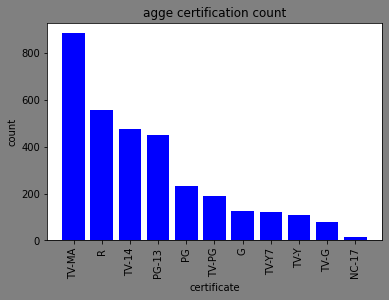

In [14]:
#as there are about 2500 production without specified genre
fig,axes=plt.subplots()
fig.patch.set_facecolor('grey')
ss=df1.loc[df1['age_certification'] != 'Unknown']
axes.bar(ss['age_certification'].value_counts().index,ss['age_certification'].value_counts(),color='b')

axes.set_ylabel('count')
axes.set_title('agge certification count')
axes.set_xlabel('certificate')
plt.xticks(rotation ='vertical')

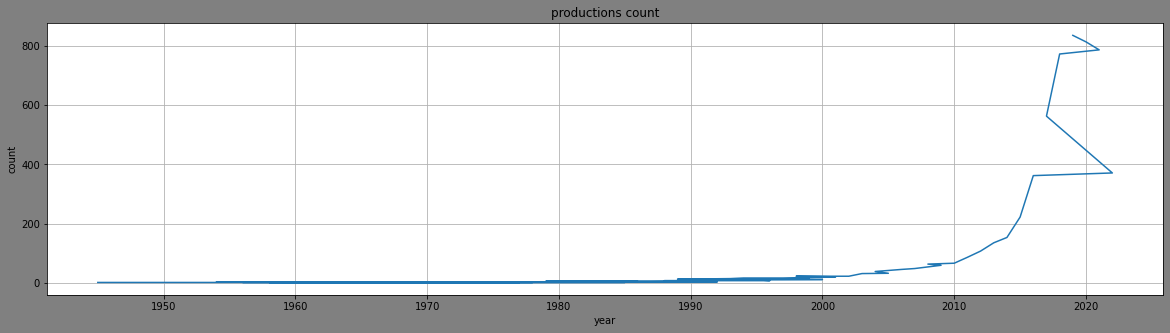

In [12]:
df1['release_year'].value_counts()

fig,axes=plt.subplots(figsize=(20,5))
fig.patch.set_facecolor('grey')
axes.plot(df1['release_year'].value_counts().index,df1['release_year'].value_counts())
axes.set_title('productions count')
axes.set_xlabel('year')
axes.set_ylabel('count')
axes.grid(True)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

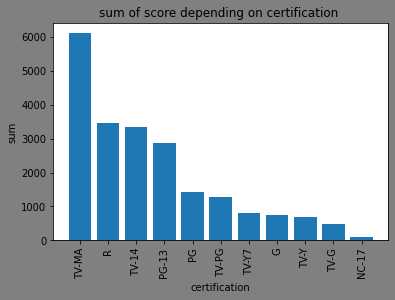

In [44]:
imdb_score = ss.groupby('age_certification')[['imdb_score']].sum().reset_index()
imdb_score=imdb_score.sort_values(by='imdb_score',ascending=False)
fig,axes=plt.subplots()
fig.patch.set_facecolor('grey')
axes.bar(imdb_score['age_certification'],imdb_score['imdb_score'])
axes.set_title('sum of score depending on certification ')
axes.set_xlabel('certification')
axes.set_ylabel('sum')
plt.xticks(rotation=90)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

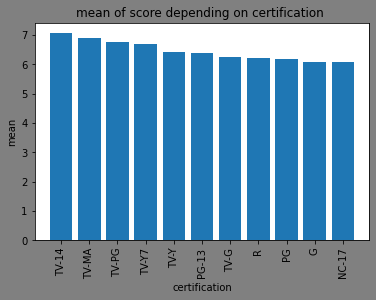

In [45]:
imdb_score = ss.groupby('age_certification')[['imdb_score']].mean().reset_index()
imdb_score=imdb_score.sort_values(by='imdb_score',ascending=False)
fig,axes=plt.subplots()
fig.patch.set_facecolor('grey')
axes.bar(imdb_score['age_certification'],imdb_score['imdb_score'])
axes.set_title('mean of score depending on certification ')
axes.set_xlabel('certification')
axes.set_ylabel('mean')
plt.xticks(rotation=90)
